# Telecom customer churn project

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To fetch the data usind panda

df = pd.read_csv("C:/Users/Omkar Gaikwad/Desktop/DATABASE/Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df1 = df.drop("customerID",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df["MonthlyCharges"].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df["TotalCharges"],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df["TotalCharges"],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df["TotalCharges"]!=' ']

In [12]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4422,Male,0,No,No,30,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),97.00,3021.3,No
2918,Male,1,Yes,No,8,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,43.35,371.4,No
6430,Female,0,Yes,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.35,275.9,No
6751,Male,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,1025.05,No
384,Male,0,No,No,48,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.10,5067.45,No


In [13]:
df.shape

(7043, 20)

In [14]:
df1['TotalCharges'] = pd.to_numeric(df1["TotalCharges"])

C:\Users\Omkar Gaikwad\AppData\Local\Temp\ipykernel_26804\3184933731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1["TotalCharges"])


In [15]:
df1['TotalCharges'].dtypes

dtype('float64')

In [16]:
tenure_not_leaving=df1[df1['Churn']=='No'].tenure
tenure_leaving=df1[df1['Churn']=='Yes'].tenure

In [17]:
tenure_leaving.shape


(1869,)

In [18]:
tenure_not_leaving.shape

(5163,)

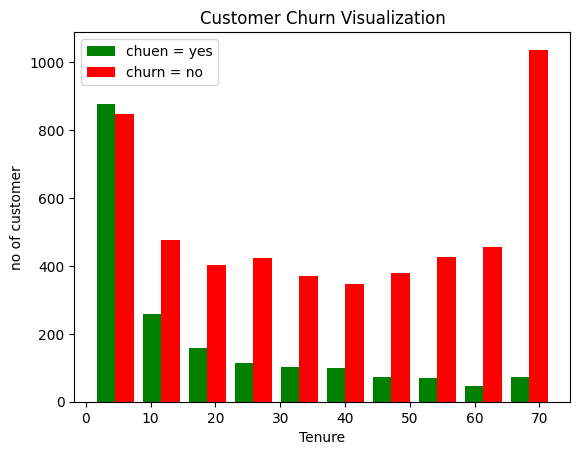

In [19]:
plt.hist([tenure_leaving,tenure_not_leaving],color=['Green','red'],label=['chuen = yes','churn = no'])
plt.xlabel("Tenure")
plt.ylabel("no of customer")
plt.title("Customer Churn Visualization")
plt.legend()

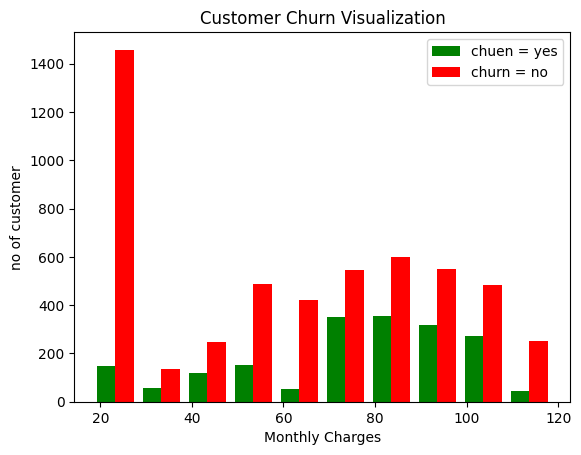

In [20]:
month_charges_yes= df[df["Churn"]=='Yes'].MonthlyCharges
month_charges_no= df[df["Churn"]=='No'].MonthlyCharges


plt.hist([month_charges_yes,month_charges_no],color=['Green','red'],label=['chuen = yes','churn = no'])
plt.xlabel("Monthly Charges")
plt.ylabel("no of customer")
plt.title("Customer Churn Visualization")
plt.legend()

In [21]:
def numeric_column(df):

    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [22]:
numeric_column(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\Omkar Gaikwad\AppData\Local\Temp\ipykernel_26804\477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\Omkar Gaikwad\AppData\Local\Temp\ipykernel_26804\477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [24]:
numeric_column(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1 , 'No':0},inplace = True)

C:\Users\Omkar Gaikwad\AppData\Local\Temp\ipykernel_26804\1250620712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1 , 'No':0},inplace = True)


In [26]:
for col in df1:
    print(f'{col}  :  {df1[col].unique()}')

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  [0 1]


In [27]:
df1['gender'].replace({'Female':1 , 'Male':0},inplace = True)

C:\Users\Omkar Gaikwad\AppData\Local\Temp\ipykernel_26804\1443086916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1 , 'Male':0},inplace = True)


In [28]:
for col in df1:
    print(f'{col}  :  {df1[col].unique()}')

gender  :  [1 0]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  [0 1]


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [30]:
df2 =pd.get_dummies(data = df1, columns =['InternetService','Contract','PaymentMethod'],dtype=int)

In [31]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [33]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [34]:
for col in df2:
    print(f'{col}  :  {df2[col].unique()}')

gender  :  [1 0]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProte

In [35]:
X = df2.drop('Churn',axis=1)
y=df2['Churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [40]:
len(X_train.columns)

26

In [41]:
import tensorflow

from tensorflow import keras

In [42]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

model.compile(loss="binary_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 5s 7ms/step - loss: 0.4765 - accuracy: 0.7796
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4254 - accuracy: 0.7964
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4171 - accuracy: 0.8030
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4123 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4110 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4093 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4084 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4073 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4069 - accur

176/176 [==============================] - 1s 6ms/step - loss: 0.3816 - accuracy: 0.8240
Epoch 82/100
176/176 [==============================] - 1s 8ms/step - loss: 0.3811 - accuracy: 0.8236
Epoch 83/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3818 - accuracy: 0.8245
Epoch 84/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3807 - accuracy: 0.8240
Epoch 85/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.8219
Epoch 86/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3812 - accuracy: 0.8212
Epoch 87/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3808 - accuracy: 0.8240
Epoch 88/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3797 - accuracy: 0.8233
Epoch 89/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3799 - accuracy: 0.8254
Epoch 90/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3808 - accuracy: 

In [43]:
#from keras.callbacks import EarlyStopping

In [44]:
#trying to use EarlyStoping because in privious run it seems like accuracy is staing same for few epochs

#model = keras.Sequential([
  #  keras.layers.Dense(20,input_shape=(26,),activation='relu'),
   # keras.layers.Dense(1,activation='sigmoid')
    #])


#callback = EarlyStopping(
 #  min_delta = 0,
  #  patience = 10,
   # verbose = 1,
    #mode = 'auto',
    #baseline =None,
    #restore_best_weights=False
#)
#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss="binary_crossentropy",optimizer =opt ,metrics = ['accuracy'])

#model.fit(X_train,y_train, epochs = 100,validation_data = (X_test,y_test),callbacks= callback)
#

In [45]:
# seems that without using EarlyStopping accuracy is better

#now trying other optimizer called RMSprop

#model = keras.Sequential([
 #   keras.layers.Dense(20,input_shape=(26,),activation='relu'),
  #  keras.layers.Dense(1,activation='sigmoid')
   # ])

#model.compile(loss="binary_crossentropy",optimizer = 'RMSprop',metrics = ['accuracy'])

#model.fit(X_train,y_train, epochs = 100)


#well by using optimizer as "RMSprop" its not getting run so decided to not run it again,
#we got our accuracy in ADAM optimizer and taking it as a final model

In [46]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [47]:
y_pred

array([[0.27118298],
       [0.3602065 ],
       [0.01555469],
       ...,
       [0.6927479 ],
       [0.718291  ],
       [0.4040396 ]], dtype=float32)

In [48]:
y_predict = []

for x in y_pred:
    if x > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [56]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [57]:
y_predict[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.65      0.48      0.55       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



In [65]:
import tensorflow as tf

Text(95.72222222222221, 0.5, 'accutual value')

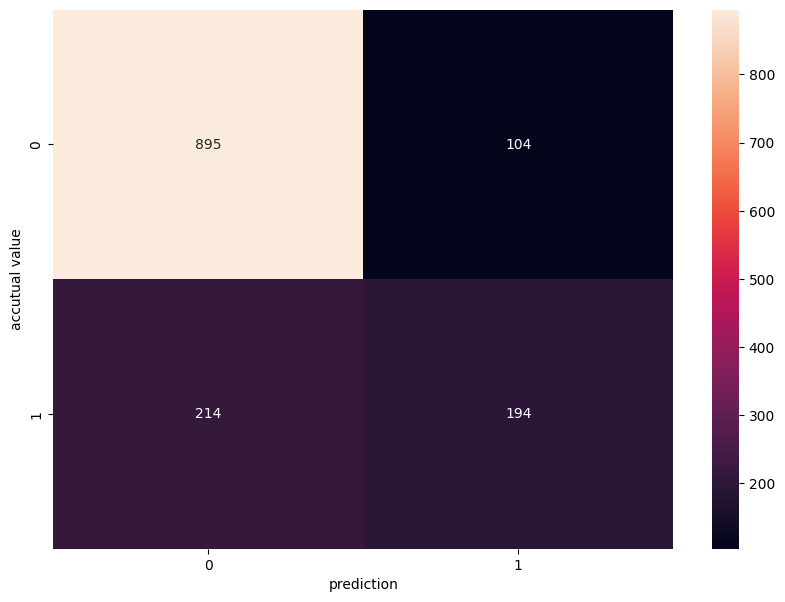

In [71]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True , fmt = 'd')
plt.xlabel("prediction")
plt.ylabel("accutual value")

# accuracy

In [73]:
round((895+194)/(895+194+214+104),2)

0.77

# Precision for 0 class. i.e. Precision for customers who did not churn

In [74]:
round((895)/(895+214),2)

0.81

# Precision for 1 class. i.e. Precision for customers who did churn

In [75]:
round((194)/(194+104),2)

0.65

# Recall for 0 class

In [76]:
round((895)/(895+104),2)

0.9

# Recall for 1 class

In [77]:
round((194)/(194+214),2)

0.48